In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings

#warnings.filterwarnings("ignore")
%matplotlib inline

In [2]:
# chlorinated data
chlo_original_data = pd.read_csv("../data/chlorinated/orig/orig_run_1_train.csv")
chlo_blended = pd.read_csv("../data/chlorinated/blended/blended_run_1_train.csv")
chlo_vae = pd.read_csv("../data/chlorinated/vae/vae_run_1_train.csv")

# sars
sars_original_data = pd.read_csv("../data/sars/orig/orig_run_1_train.csv")
sars_blended = pd.read_csv("../data/sars/blended/blended_run_1_train.csv")
sars_vae = pd.read_csv("../data/sars/vae/vae_run_1_train.csv")

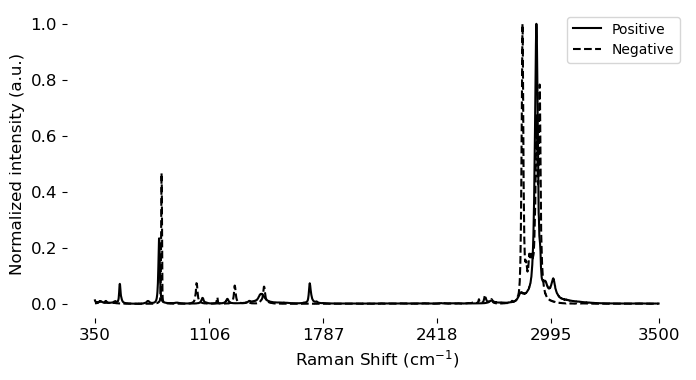

In [3]:
x_ticks = [0, 500, 1000, 1500, 2000, 2472]
chlo_ticks = chlo_original_data.columns[x_ticks].values
chlo_ticks = [int(float(i)) for i in chlo_ticks]

plt.figure(figsize=(8, 4))

plt.xlabel("Raman Shift (cm$^{-1}$)", fontsize=12)
plt.ylabel("Normalized intensity (a.u.)", fontsize=12)
plt.yticks(fontsize=12)
plt.xticks(x_ticks, labels=chlo_ticks, fontsize=12)
plt.box(False)

# first sample for both classes selected
plt.plot(chlo_original_data.iloc[0, :-1], "k", label="Positive")
plt.plot(chlo_original_data.iloc[51, :-1], "k--", label="Negative")
    
plt.legend(fontsize=10)
#plt.savefig("../figs/chlo_original_sample_graph.png", bbox_inches='tight')

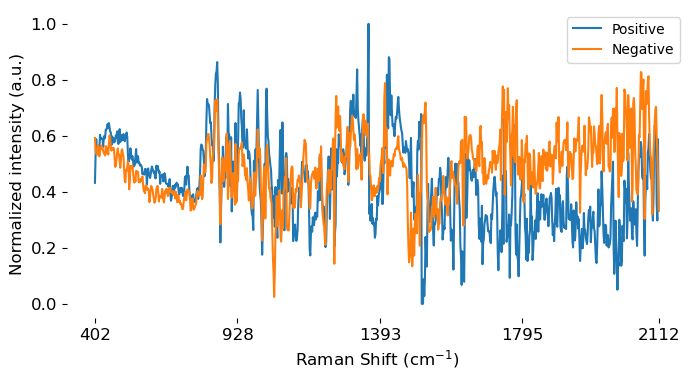

In [4]:
x_ticks = [0, 225, 450, 675, 890]
sars_ticks = sars_original_data.columns[x_ticks].values
sars_ticks = [int(float(i)) for i in sars_ticks]

plt.figure(figsize=(8, 4))

plt.xlabel("Raman Shift (cm$^{-1}$)", fontsize=12)
plt.ylabel("Normalized intensity (a.u.)", fontsize=12)
plt.yticks(fontsize=12)
plt.xticks(x_ticks, labels=sars_ticks, fontsize=12)
plt.box(False)

# first sample for both classes selected
plt.plot(sars_original_data.iloc[100, :-1], label="Positive")
plt.plot(sars_original_data.iloc[0, :-1],  label="Negative")

plt.legend(fontsize=10)
#plt.savefig("../figs/sars_original_sample_graph.jpg", bbox_inches='tight')

In [5]:
c_pos_o = chlo_original_data.iloc[:50, :-1].sample(1)
c_pos_b = chlo_blended.iloc[:11474, :-1].sample(1)
c_pos_v = chlo_vae.iloc[:11474, :-1].sample(1)
c_pos_samples = pd.DataFrame(pd.concat([c_pos_o, c_pos_b, c_pos_v], axis=0))

c_neg_o = chlo_original_data.iloc[51:, :-1].sample(1)
c_neg_b = chlo_blended.iloc[11475:, :-1].sample(1)
c_neg_v = chlo_vae.iloc[1175:, :-1].sample(1)
c_neg_samples = pd.DataFrame(pd.concat([c_neg_o, c_neg_b, c_neg_v], axis=0))


s_pos_o = sars_original_data.iloc[51:, :-1].sample(1)
s_pos_b = sars_blended.iloc[:12402, :-1].sample(1)
s_pos_v = sars_vae.iloc[:11474, :-1].sample(1)
s_pos_samples = pd.DataFrame(pd.concat([s_pos_o, s_pos_b, s_pos_v], axis=0))

s_neg_o = sars_original_data.iloc[:50, :-1].sample(1)
s_neg_b = sars_blended.iloc[12402:, :-1].sample(1)
s_neg_v = sars_vae.iloc[11475:, :-1].sample(1)
s_neg_samples = pd.DataFrame(pd.concat([s_neg_o, s_neg_b, s_neg_v], axis=0))

In [6]:
# # graph synthetic samples
# fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12,4))
# plt.subplots_adjust(wspace=0.01, hspace=0)

# ax1.set_xlabel("Raman Shift (cm$^{-1}$)", fontsize=12)
# ax1.set_ylabel("Normalized intensity (a.u.)", fontsize=12)
# ax1.set_xticks(x_ticks, labels=chlo_ticks, fontsize=12)
# ax1.set_title("Negative")

# # random negative (healthy) samples
# ax1.plot(neg_samples.iloc[1], "r", label="Blended")
# ax1.plot(neg_samples.iloc[2], "g", label="VAE")
# ax1.plot(neg_samples.iloc[0], "y", label="Original")

# ax2.set_xlabel("Raman Shift (cm$^{-1}$)", fontsize=12)
# ax2.set_title("Positive")
# ax2.set_xticks(x_ticks, labels=chlo_ticks, fontsize=12)
# ax2.set_yticks([])

# # random positive (healthy) samples

# ax2.plot(pos_samples.iloc[1], "r", label="Blended")
# ax2.plot(pos_samples.iloc[2], "g", label="VAE")
# ax2.plot(pos_samples.iloc[0], "y", label="Original")

# leg = plt.legend(bbox_to_anchor=(0, -0.3), loc='lower center', ncol=3, borderaxespad=0)

# plt.savefig("../figs/chlorinated_synthetic_samples.jpg", bbox_inches='tight')

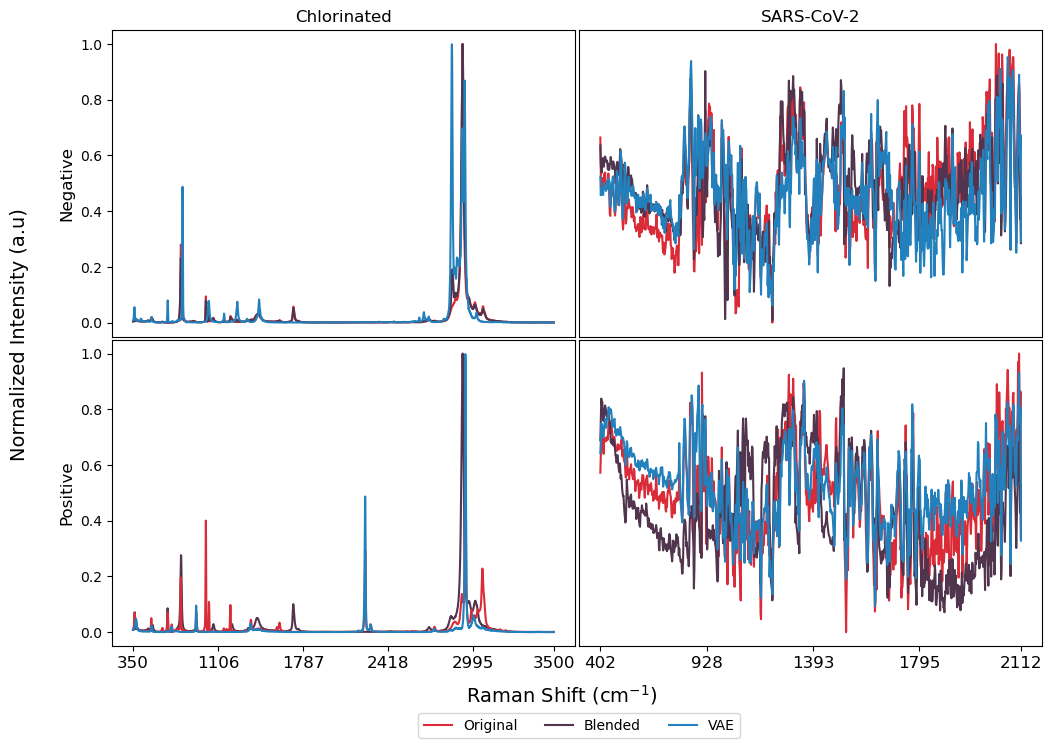

In [28]:
# graph synthetic samples
chlo_x_ticks = [0, 500, 1000, 1500, 2000, 2472]
sars_x_ticks = [0, 225, 450, 675, 890]

fig, (ax1, ax2) = plt.subplots(2, 2, figsize=(12,8))
plt.subplots_adjust(wspace=0.01, hspace=0.01)

fig.text(0.04, 0.5, 'Normalized Intensity (a.u)', va='center', rotation='vertical', fontsize=14)
fig.text(0.5, 0.04, 'Raman Shift (cm$^{-1}$)', ha='center', fontsize=14)

ax1[0].set_ylabel("Negative", fontsize=12)
ax1[0].set_xticks([])
ax1[0].set_title("Chlorinated")
ax2[0].set_ylabel("Positive", fontsize=12)
#ax2[0].set_xlabel("Raman Shift (cm$^{-1}$)", fontsize=12)
ax2[0].set_xticks(chlo_x_ticks, labels=chlo_ticks, fontsize=12)

# random negative (healthy) samples
ax1[0].plot(c_neg_samples.iloc[0], "#DA2C38", label="Original")
ax1[0].plot(c_neg_samples.iloc[1], "#51344D", label="Blended")
ax1[0].plot(c_neg_samples.iloc[2], "#2281BC", label="VAE")

# random positive (healthy) samples
ax2[0].plot(c_pos_samples.iloc[0], "#51344D", label="Original")
ax2[0].plot(c_pos_samples.iloc[1], "#DA2C38", label="Blended")
ax2[0].plot(c_pos_samples.iloc[2], "#2281BC", label="VAE")

#########################################################################################

ax1[1].set_xticks([])
ax1[1].set_yticks([])
ax1[1].set_title("SARS-CoV-2")
ax2[1].set_yticks([])
#ax2[1].set_xlabel("Raman Shift (cm$^{-1}$)", fontsize=12)
ax2[1].set_xticks(sars_x_ticks, labels=sars_ticks, fontsize=12)

# random negative (healthy) samples
ax1[1].plot(s_neg_samples.iloc[0], "#DA2C38", label="Original")
ax1[1].plot(s_neg_samples.iloc[1], "#51344D", label="Blended")
ax1[1].plot(s_neg_samples.iloc[2], "#2281BC", label="VAE")

# random positive (healthy) samples
ax2[1].plot(s_pos_samples.iloc[0], "#DA2C38", label="Original")
ax2[1].plot(s_pos_samples.iloc[1], "#51344D", label="Blended")
ax2[1].plot(s_pos_samples.iloc[2], "#2281BC", label="VAE")

plt.legend(bbox_to_anchor=(0, -0.3), loc='lower center', ncol=3, borderaxespad=0)

plt.savefig("../figs/all_synthetic_samples.png", bbox_inches='tight')

In [ ]:
# graph synthetic samples
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12,4))
plt.subplots_adjust(wspace=0.01, hspace=0)

ax1.set_xlabel("Raman Shift (cm$^{-1}$)", fontsize=12)
ax1.set_ylabel("Normalized intensity (a.u.)", fontsize=12)
ax1.set_xticks(x_ticks, labels=sars_ticks, fontsize=12)
ax1.set_title("Negative")

# random negative (healthy) samples
ax1.plot(neg_samples.iloc[0], "r", label="Original")
ax1.plot(neg_samples.iloc[1], "g", label="Blended")
ax1.plot(neg_samples.iloc[2], "b", label="VAE")

ax2.set_xlabel("Raman Shift (cm$^{-1}$)", fontsize=12)
ax2.set_title("Positive")
ax2.set_xticks(x_ticks, labels=sars_ticks, fontsize=12)
ax2.set_yticks([])

# random positive (healthy) samples
ax2.plot(pos_samples.iloc[0], "r", label="Original")
ax2.plot(pos_samples.iloc[1], "g", label="Blended")
ax2.plot(pos_samples.iloc[2], "b", label="VAE")

leg = plt.legend(bbox_to_anchor=(0, -0.3), loc='lower center', ncol=3, borderaxespad=0)

#plt.savefig("../figs/chlorinated_synthetic_samples.jpg", bbox_inches='tight')